# Stochastic Collocation using sparse grids for Elliptic Problems

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

## Sparse Grids

In [7]:
import sys
sys.path.append('../..')
from python.mluqmppy import *
from matplotlib import gridspec

mpp = mppy.Mpp(
    project_name='MLUQ',
    executable='M++',
    kernels=4,
    mute=False,
    build_dir='mpp/build-elliptic-sc',
    cmake_args='-DMPP_BUILD_TYPE=MppRelease'
)

mpp.build()


================ running cmake ================

-- Option:     SPACE_DIM= 2   (using cached value)
-- Option:     USE_FFTW= ON   (using cached value)
-- Option:     USE_SPACETIME= OFF   (using cached value)
-- Option:     USE_SPLITTED_COMMS= ON   (using cached value)
-- Option:     AFFINE_LINEAR_TRAFO= ON   (using cached value)
-- Option:     BUILD_TESTS= OFF   (using cached value)
-- Option:     BUILD_TUTORIAL= ON   (using cached value)
-- Option:     BUILD_MLUQ_TESTS= ON   (using cached value)
-- Sub option: BUILD_TUTORIAL_TESTS= ON   (using cached value)
-- Option:     MPP_BUILD_TYPE= MppRelease   (using cached value)
-- Found OpenMP_C: -fopenmp  
-- Found OpenMP_CXX: -fopenmp  
-- Found OpenMP: TRUE   
-- A library with LAPACK API found.
-- Checking for LAPACK LQ factorization: found
-- 
-- Tasmanian 7.6 (development): summary of build options
--  -D CMAKE_BUILD_TYPE:STRING=Debug
--  -D CMAKE_INSTALL_PREFIX:PATH=/usr/local
--  -D CMAKE_CXX_FLAGS:STRING=
--  -D BUILD_SHARED_LIBS=O

[ 95%] Linking CXX executable TestKLExpansionGenerator
[ 95%] Built target TestKLExpansionGenerator
[ 95%] Building CXX object mluq/tests/CMakeFiles/TestHybridFluxGeneratorMPI.dir/generators/TestHybridFluxGenerator.cpp.o
[ 95%] Built target TestPlotting
[ 95%] Building CXX object mluq/tests/CMakeFiles/TestEstimatorMap.dir/estimators/datastructure/TestEstimatorMap.cpp.o
[ 95%] Built target TestMainMPI
[ 95%] Building CXX object mluq/tests/CMakeFiles/TestExponents.dir/estimators/datastructure/TestExponents.cpp.o
[ 95%] Built target TestMultilevelErrors
[ 96%] Building CXX object mluq/tests/CMakeFiles/TestNormalDistributionMPI.dir/generators/TestNormalDistribution.cpp.o
[ 97%] Linking CXX executable TestHybridFluxGeneratorMPI
[ 97%] Built target TestHybridFluxGeneratorMPI
[ 97%] Building CXX object mluq/tests/CMakeFiles/TestMultilevelMonteCarloMPI.dir/estimators/TestMultilevelMonteCarlo.cpp.o
[ 97%] Linking CXX executable TestEstimatorMap
[ 97%] Linking CXX executable TestExponents
[ 97%]

0

Let $ g:[0,1]^d \to \mathbb{R} $ and we want to estimate the following integral 
    $$ \int_{[0,1]^d}g(z)dz = \int_{0}^{1}...\int_{0}^{1}g(z_1,...,z_d)dz_1...dz_d \approx \sum_{r_1=1}^{R_{l_1}}...\sum_{r_d=1}^{R_{l_d}} g(z_1^{r_1},...,z_d^{r_d})\omega_{l_1}^{r_1}...\omega_{l_d}^{r_d}. $$
So we can write the quadrature rule in d dimensions as $ Q^{(d)}g = Q^{(1)}_{l_1}\otimes...\otimes Q^{(1)}_{l_1} $, i.e., by applying d one dimensional quadrature rules.

The Quadrature rule,at level l, written as a telescoping sum reads $$ Q^{(1)}_{l}g = \sum_{i=0}^{l}\Delta^{(1)}_i g $$ where $ \Delta^{(1)}_i = Q^{(1)}_{i} - Q^{(1)}_{i-1} $ and $ \Delta^{(1)}_0 = Q^{(1)}_{0} $.

So for sparse grid quadrature the d dimensional quadrature rule at level l is given as, 
$$ Q^{(d)}_{l}g = \sum_{|k| \leq l + d -1} \left(\Delta^{(1)}_{k_1}\otimes...\otimes\Delta^{(1)}_{k_d}\right)g. $$

Sparse grids are constructed such that they integrate polynomials of a certain total degree as compared to tensorised qudrature which integrate polynomials upto a certain maximum degree.[3]

### Gauss-Hermite

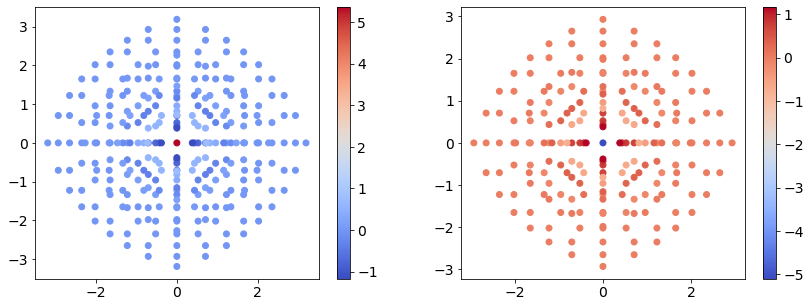

In [8]:
sparse_grid_plot(8, "gauss-hermite", mpp)

### Clenshaw-Curtis

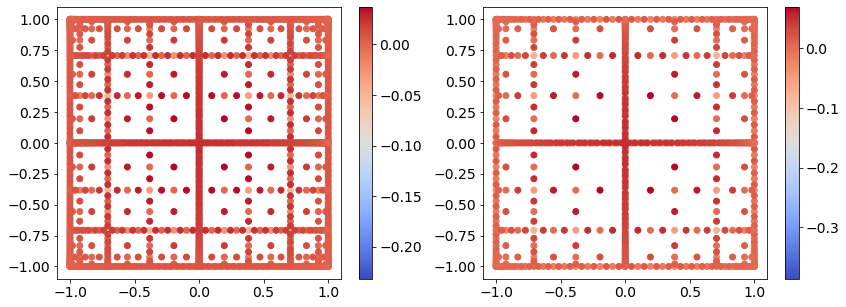

In [9]:
sparse_grid_plot(8, "clenshaw-curtis", mpp)

## Example

In this exercise we take look at a slightly modified example from the Babuska et. al. [1], to study stochastic collocation using sparse grids [2],

\begin{align}
\text{div} \, \big( \kappa(\omega, x_1, x_2) u(\omega, x_1, x_2) \big) &= 0, \quad \text{on} \quad D = (0,1)^2\\
                                                  u(\omega, x_1,x_2) &= 0, \quad \text{on} \quad x_2 = 0 \\
                                  \nabla  u(\omega, x_1,x_2) \cdot n &=-1, \quad \text{on} \quad x_2 = 1 \\
                                  \nabla  u(\omega, x_1,x_2) \cdot n &= 0, \quad \text{on} \quad x_1 \in \{ 0, 1 \} 
\end{align}

The model for $\kappa \colon \Omega \times \overline{D} \longrightarrow \mathbb{R}_{\text{sym}}^{d \times d}$ is given by

\begin{aligned}
\kappa(\omega, x) = \kappa_{\min} + \exp \left\{ ( Y_{1}(\omega) \cos (\pi z) + Y_{3}(\omega) \sin (\pi z) 
+ Y_{2}(\omega) \cos (\pi x)+Y_{4}(\omega) \sin (\pi x) ) e^{-\frac{1}{8}}\right\}
\end{aligned}

with $\kappa_{\text{min}} = 0.01$ and $Y_n$ as independent identically and uniformly distributed random variables with mean zero and variance one for $n = 1, \dots 4$. 


### With Sparse Grids  

In [10]:
mpp.reset_data()

stochLevel = 4 
meshLevel = 5
kwargs = {"Problem": "SparseGridLaplace2D",
          "Estimator": "SC",
          "stochLevel": stochLevel,
          "Level": meshLevel}

mpp.run(config="sc_elliptic", kwargs=kwargs)


================ running  mpp ================

start program on 4 procs at Wed May 25 14:53:07 2022
Running on: niklas-ThinkPad-T470p
   Config Info:
     ConfigVerbose: ........................... 1
     NewtonVerbose: ........................... 0
     MeshesVerbose: ........................... 0
     MLMCVerbose: ............................. 1
     MainVerbose: ............................. 1
     MCVerbose: ............................... 1
     Model: ................................... LagrangeElliptic
     Level: ................................... 5
     Samples: ................................. 100
     AssembleVerbose: ......................... 0
     degree: .................................. 2
     Quantity: ................................ L2
     MeshVerbose: ............................. 0
     Estimator: ............................... SC
     Problem: ................................. SparseGridLaplace2D
     epsilon: ................................. 0.01
     Onl

0

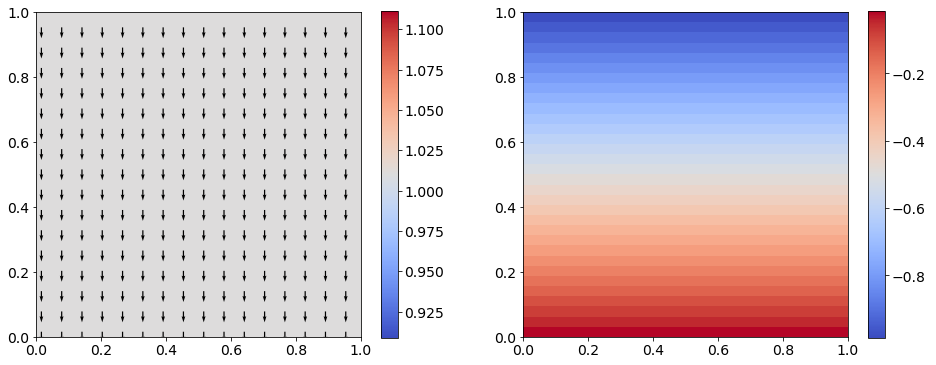

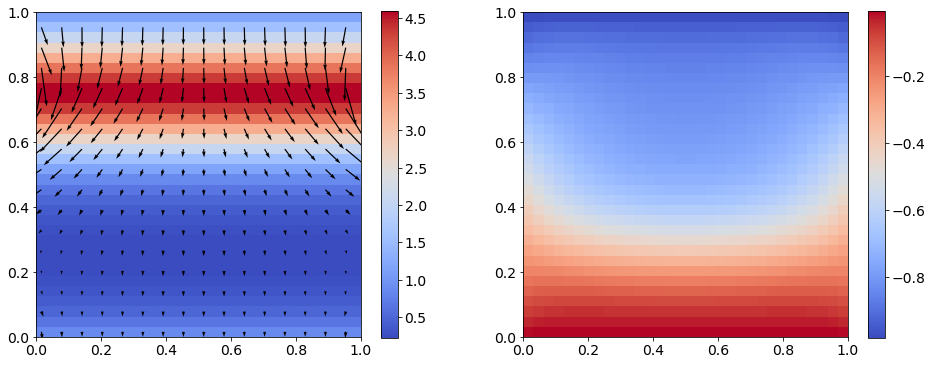

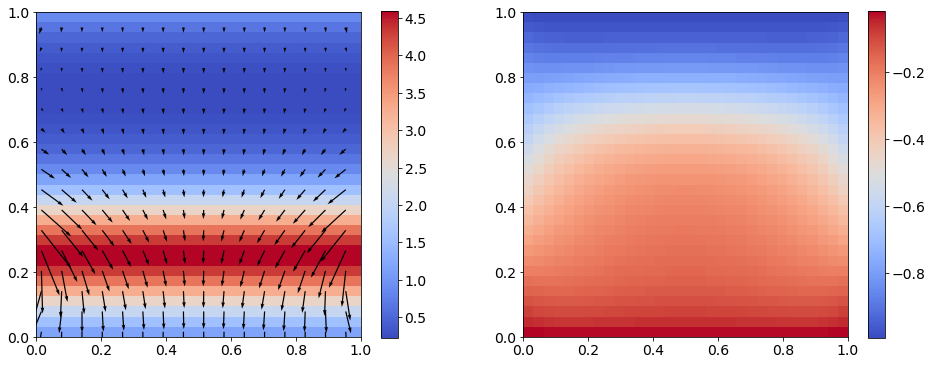

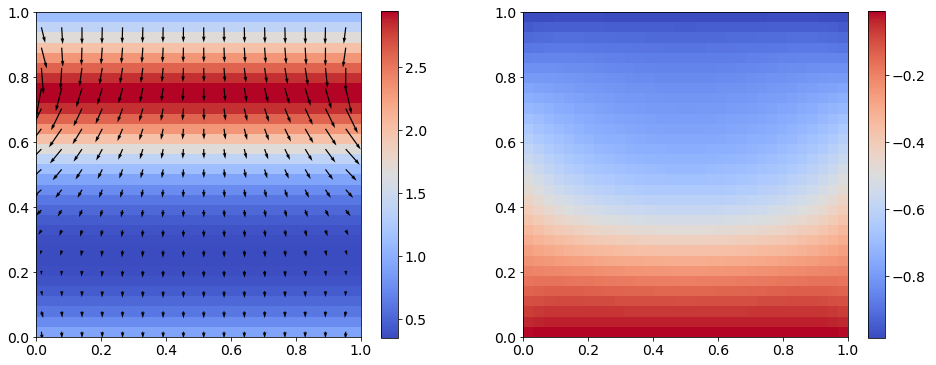

In [13]:
for n in range(0,4):
    p = mpp.vtu_plot(figsize=(16, 6))
    plt.axis('off')
    gs = gridspec.GridSpec(1, 2)
    p.ax1 = p.fig.add_subplot(gs[0])
    p.add_vtu("Kappa.5.0.{}.vtu".format(n), ax=p.ax1)
    p.add_quivers("Flux.5.0.{}.vtu".format(n), ax=p.ax1)
    p.ax2 = p.fig.add_subplot(gs[1])
    p.add_vtu("Pressure.5.0.{}.vtu".format(n), ax=p.ax2)

### With Monte Carlo

In [14]:
mpp.reset_data()
mpp.clean_data()

samples = 401 
meshLevel = 5
kwargs = {"Problem":"UniformDistributionLaplace2D",
          "Estimator":"MC", 
          "Samples": samples,
          'Level': meshLevel}

mpp.run(config="sc_elliptic", kwargs=kwargs)


================ running  mpp ================

start program on 4 procs at Wed May 25 14:55:45 2022
Running on: niklas-ThinkPad-T470p
   Config Info:
     ConfigVerbose: ........................... 1
     NewtonVerbose: ........................... 0
     MeshesVerbose: ........................... 0
     MLMCVerbose: ............................. 1
     MainVerbose: ............................. 1
     MCVerbose: ............................... 1
     Model: ................................... LagrangeElliptic
     Level: ................................... 5
     Samples: ................................. 401
     AssembleVerbose: ......................... 0
     degree: .................................. 2
     Quantity: ................................ L2
     MeshVerbose: ............................. 0
     Estimator: ............................... MC
     Problem: ................................. UniformDistributionLaplace2D
     epsilon: ................................. 0.01

0

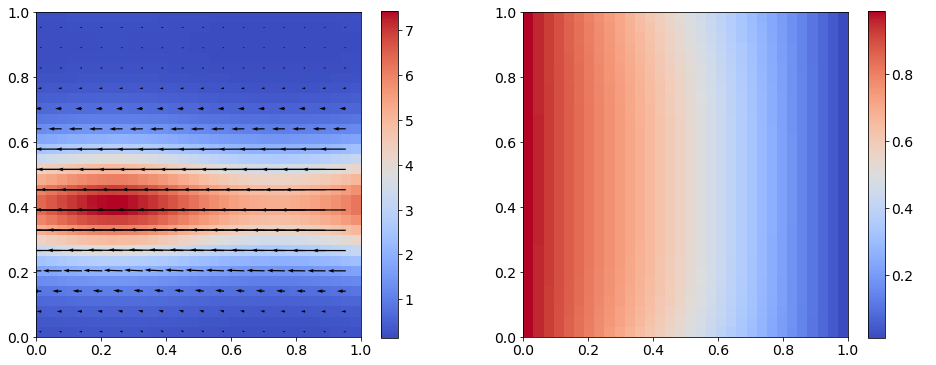

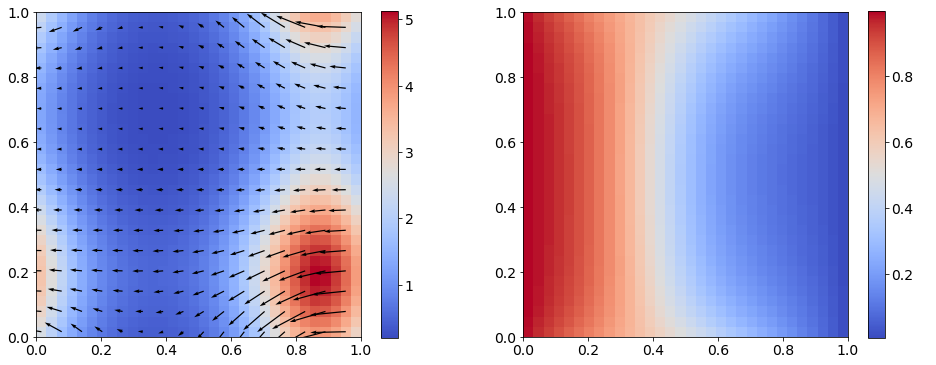

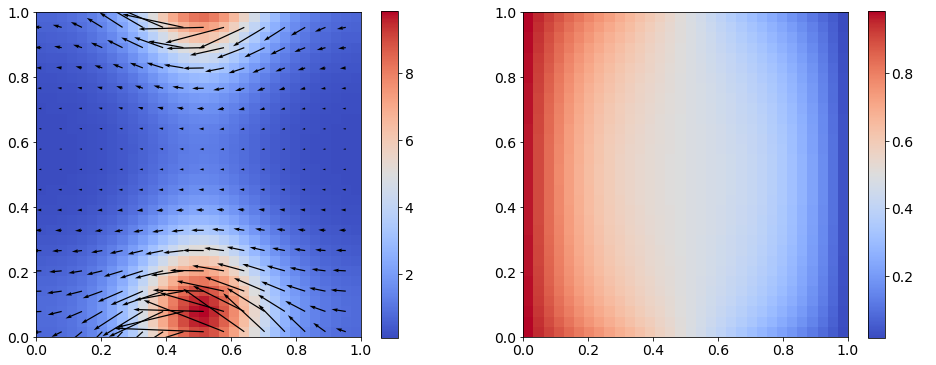

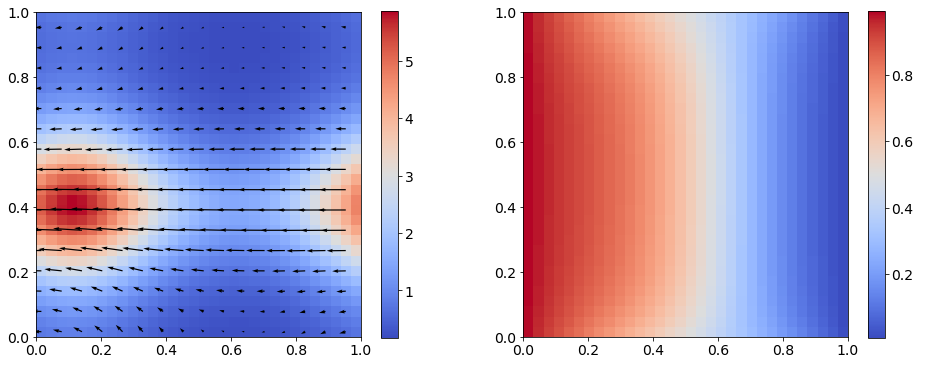

In [15]:
for n in range(0, 4):
    p = mpp.vtu_plot(figsize=(16, 6))
    plt.axis('off')
    gs = gridspec.GridSpec(1, 2)
    p.ax1 = p.fig.add_subplot(gs[0])
    p.add_vtu("Kappa.5.0.{}.vtu".format(n), ax=p.ax1)
    p.add_quivers("Flux.5.0.{}.vtu".format(n), ax=p.ax1)
    p.ax2 = p.fig.add_subplot(gs[1])
    p.add_vtu("Pressure.5.0.{}.vtu".format(n), ax=p.ax2)  

## Analysing evolution of QoI (or Total Error) subject to stochastic parameters

In [16]:
import socket

print(socket.gethostname())

if socket.gethostname().find("niklas") != -1:
    mpp.kernels = 4
    mpp.mute = False
    samples = [137, 401, 1105, 2929]
    levels = [3, 4, 5] 
    stochLevels = [2, 3, 4, 5]
     
elif socket.gethostname().find("runner") != -1:
    mpp.kernels = 16
    mpp.mute = False
    samples = [137, 401, 1105, 2929, 7537]
    levels = [3, 4, 5, 6] 
    stochLevels = [2, 3, 4, 5, 6]
    
else:
    mpp.kernels = 64
    mpp.mute = False
    samples = [137, 401, 1105, 2929, 7537, 18945]
    levels = [3, 4, 5, 6, 7] 
    stochLevels = [2, 3, 4, 5, 6, 7]
    

niklas-ThinkPad-T470p


### QoI for varying sparse grid and mesh levels

Comparing the Quantity of Interest, L2 norm of the solution in this case, and the Total error for varying sparse grid and mesh levels 


================ running  mpp ================

start program on 4 procs at Wed May 25 14:57:36 2022
Running on: niklas-ThinkPad-T470p
   Config Info:
     ConfigVerbose: ........................... 1
     NewtonVerbose: ........................... 0
     MeshesVerbose: ........................... 0
     MLMCVerbose: ............................. 1
     MainVerbose: ............................. 1
     MCVerbose: ............................... 1
     Model: ................................... LagrangeElliptic
     Level: ................................... 3
     Samples: ................................. 100
     AssembleVerbose: ......................... 0
     degree: .................................. 2
     Quantity: ................................ L2
     MeshVerbose: ............................. 0
     Estimator: ............................... SC
     Problem: ................................. SparseGridLaplace2D
     epsilon: ................................. 0.01
     Onl

     SSC3: Start with: M=0 dM=137 Mpara=0 MComm=0 dMComm=137
     SSC3: MeanQ=0 MeanY=0 MeanC=0 MeanQpara=0 MeanYpara=0 MeanCpara=0 MeanQcomm=0 MeanYcomm=0 MeanCcomm=0
     SSC3: SVarQ=0 SVarY=0 SVarC=0 SVarQpara=0 SVarYpara=0 SVarCpara=0 SVarQcomm=0 SVarYcomm=0 SVarCcomm=0
     SSC3: End with: M=137 dM=0 Mpara=0 MComm=0 dMComm=0
     SSC3: MeanQ=0.58236313 MeanY=0.00076374195 MeanC=0.0078247664 MeanQpara=0 MeanYpara=0 MeanCpara=0 MeanQcomm=0 MeanYcomm=0 MeanCcomm=0
     SSC3: SVarQ=0.0024693765 SVarY=1.1585178e-06 SVarC=3.3591433e-05 SVarQpara=0 SVarYpara=0 SVarCpara=0 SVarQcomm=0 SVarYcomm=0 SVarCcomm=0
     SSC3:  3.00 seconds
   StochasticCollocation Experiment:  3.00 seconds

   Estimator Results Info:
     Cost: .................................... 0.0078247664
     Value: ................................... 0.58236313
     Epsilon: ................................. 0.01
     Total Error: ............................. 0.0050092862
     Numerical Error: ......................... 0

start program on 4 procs at Wed May 25 14:58:13 2022
Running on: niklas-ThinkPad-T470p
   Config Info:
     ConfigVerbose: ........................... 1
     NewtonVerbose: ........................... 0
     MeshesVerbose: ........................... 0
     MLMCVerbose: ............................. 1
     MainVerbose: ............................. 1
     MCVerbose: ............................... 1
     Model: ................................... LagrangeElliptic
     Level: ................................... 4
     Samples: ................................. 100
     AssembleVerbose: ......................... 0
     degree: .................................. 2
     Quantity: ................................ L2
     MeshVerbose: ............................. 0
     Estimator: ............................... SC
     Problem: ................................. SparseGridLaplace2D
     epsilon: ................................. 0.01
     OnlyFine: ................................ false
   

     SSC4: Start with: M=0 dM=1105 Mpara=0 MComm=0 dMComm=1105
     SSC4: MeanQ=0 MeanY=0 MeanC=0 MeanQpara=0 MeanYpara=0 MeanCpara=0 MeanQcomm=0 MeanYcomm=0 MeanCcomm=0
     SSC4: SVarQ=0 SVarY=0 SVarC=0 SVarQpara=0 SVarYpara=0 SVarCpara=0 SVarQcomm=0 SVarYcomm=0 SVarCcomm=0
     SSC4: End with: M=1105 dM=0 Mpara=0 MComm=0 dMComm=0
     SSC4: MeanQ=0.58272229 MeanY=5.8907885e-05 MeanC=0.019538468 MeanQpara=0 MeanYpara=0 MeanCpara=0 MeanQcomm=0 MeanYcomm=0 MeanCcomm=0
     SSC4: SVarQ=0.0026519043 SVarY=5.1641936e-09 SVarC=6.8554895e-05 SVarQpara=0 SVarYpara=0 SVarCpara=0 SVarQcomm=0 SVarYcomm=0 SVarCcomm=0
     SSC4: 28.00 seconds
   StochasticCollocation Experiment: 28.00 seconds

   Estimator Results Info:
     Cost: .................................... 0.019538468
     Value: ................................... 0.58272229
     Epsilon: ................................. 0.01
     Total Error: ............................. 0.0016080733
     Numerical Error: ......................... 

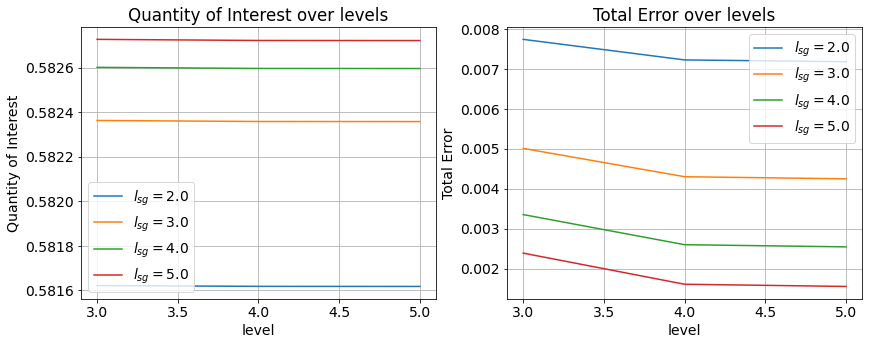

In [17]:
mpp.reset_data()
mpp.clean_data()

kwargs = {"Problem": "SparseGridLaplace2D",
          "Estimator": "SC"}

for stochLevel in stochLevels:
    for level in levels:
        kwargs["stochLevel"] = stochLevel
        kwargs["Level"] = level     
        mpp.run(config="sc_elliptic", kwargs=kwargs)
        mpp.parse_log()

value_error_over_level_plot(mpp, label="stochLevel")

### QoI and total error for varying monte carlo sample sizes and mesh levels


================ running  mpp ================

start program on 4 procs at Wed May 25 15:09:41 2022
Running on: niklas-ThinkPad-T470p
   Config Info:
     ConfigVerbose: ........................... 1
     NewtonVerbose: ........................... 0
     MeshesVerbose: ........................... 0
     MLMCVerbose: ............................. 1
     MainVerbose: ............................. 1
     MCVerbose: ............................... 1
     Model: ................................... LagrangeElliptic
     Level: ................................... 3
     Samples: ................................. 137
     AssembleVerbose: ......................... 0
     degree: .................................. 2
     Quantity: ................................ L2
     MeshVerbose: ............................. 0
     Estimator: ............................... MC
     Problem: ................................. UniformDistributionLaplace2D
     epsilon: ................................. 0.01

     SMC3: End with: M=401 dM=0 Mpara=0 MComm=0 dMComm=0
     SMC3: MeanQ=0.57986141 MeanY=0.00063343708 MeanC=0.0089684925 MeanQpara=0 MeanYpara=0 MeanCpara=0 MeanQcomm=0 MeanYcomm=0 MeanCcomm=0
     SMC3: SVarQ=0.0020110509 SVarY=4.7512525e-07 SVarC=1.8835368e-06 SVarQpara=0 SVarYpara=0 SVarCpara=0 SVarQcomm=0 SVarYcomm=0 SVarCcomm=0
     SMC3:  3.60 seconds
   MonteCarlo Experiment:  3.60 seconds

   Estimator Results Info:
     Cost: .................................... 3.5963655
     Value: ................................... 0.57986141
     Epsilon: ................................. 0.01
     Total Error: ............................. 0.0028728767
     Numerical Error: ......................... 0.00063343708
     Stochastical Error: ...................... 0.0022394396

end program after  3.64 seconds on 4 procs at Wed May 25 15:09:58 2022

================ running  mpp ================

start program on 4 procs at Wed May 25 15:09:58 2022
Running on: niklas-ThinkPad-T470p
   Conf

start program on 4 procs at Wed May 25 15:11:03 2022
Running on: niklas-ThinkPad-T470p
   Config Info:
     ConfigVerbose: ........................... 1
     NewtonVerbose: ........................... 0
     MeshesVerbose: ........................... 0
     MLMCVerbose: ............................. 1
     MainVerbose: ............................. 1
     MCVerbose: ............................... 1
     Model: ................................... LagrangeElliptic
     Level: ................................... 4
     Samples: ................................. 1105
     AssembleVerbose: ......................... 0
     degree: .................................. 2
     Quantity: ................................ L2
     MeshVerbose: ............................. 0
     Estimator: ............................... MC
     Problem: ................................. UniformDistributionLaplace2D
     epsilon: ................................. 0.01
     OnlyFine: ................................

     SMC4: End with: M=2929 dM=0 Mpara=0 MComm=0 dMComm=0
     SMC4: MeanQ=0.58053239 MeanY=3.8063534e-05 MeanC=0.038124337 MeanQpara=0 MeanYpara=0 MeanCpara=0 MeanQcomm=0 MeanYcomm=0 MeanCcomm=0
     SMC4: SVarQ=0.0021201098 SVarY=2.0248405e-09 SVarC=2.1056864e-05 SVarQpara=0 SVarYpara=0 SVarCpara=0 SVarQcomm=0 SVarYcomm=0 SVarCcomm=0
     SMC4: 1:53.00 minutes
   MonteCarlo Experiment: 1:53.00 minutes

   Estimator Results Info:
     Cost: .................................... 111.66618
     Value: ................................... 0.58053239
     Epsilon: ................................. 0.01
     Total Error: ............................. 0.00088884789
     Numerical Error: ......................... 3.8063534e-05
     Stochastical Error: ...................... 0.00085078435

end program after 1:53.00 minutes on 4 procs at Wed May 25 15:17:02 2022

================ running  mpp ================

start program on 4 procs at Wed May 25 15:17:03 2022
Running on: niklas-ThinkPad-T470p

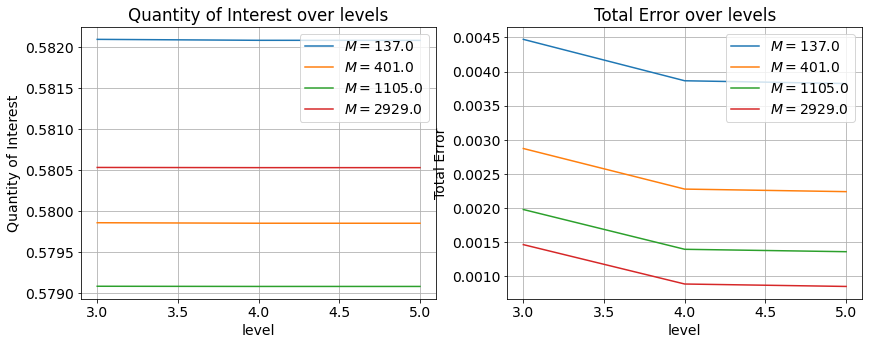

In [18]:
mpp.reset_data()
mpp.clean_data()

kwargs = {"Problem": "UniformDistributionLaplace2D", 
          "Estimator": "MC"} 

for sample in samples:
    for level in levels:
        kwargs["Samples"] = sample
        kwargs["Level"] = level     
        mpp.run(config="sc_elliptic", kwargs=kwargs)
        mpp.parse_log()

value_error_over_level_plot(mpp, label="Samples")

### Bibliography
[1] $\textit{A Stochastic Collocation Method for Elliptic Partial Differential Equations with Random Input Data}$, 
Ivo Babuška, Fabio Nobile, and Raúl Tempone, SIAM Journal on Numerical Analysis 2007 45:3, 1005-1034. 

[2] $\textit{Tasmanian}$, Stoyanov, Miroslav and Lebrun-Grandie, Damien and Burkardt, John and Munster, Drayton, https://github.com/ORNL/Tasmanian}, doi = 10.11578/dc.20171025.on.1087, 2013

[3] Prof. Dr. Martin Frank, Lecture Note : Uncertainty Quantification, SS20, SCC KIT 

[4] https://tasmanian.ornl.gov/documents/TasmanianMathManual.pdf